In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import sys
sys.path.append('../../')

from glash_v2 import glash_discriminator, glash_generator, Glash
from helpers import toy_data, show_samples, make_animation

physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

2022-04-04 18:13:14.352957: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-04 18:13:15.813024: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-04 18:13:15.813765: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-04 18:13:15.867077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 18:13:15.867202: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-04-04 18:13:15.867217: I tensorflow/stream_executor/platform/defa

2022-04-04 18:13:15.920924: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-04 18:13:15.921583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 18:13:15.921760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-04-04 18:13:15.921790: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcu

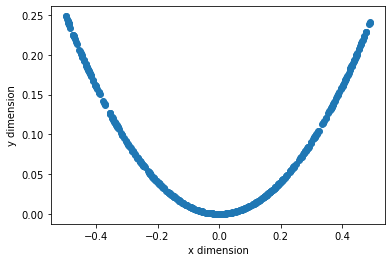

In [2]:
# Create the training dataset
data = toy_data(500, -0.5, 0.5)
data = data.astype('float32')
plt.xlabel('x dimension')
plt.ylabel('y dimension')
plt.scatter(data[:, 0], data[:, 1])

train_data = tf.data.Dataset.from_tensor_slices(data)
train_data = train_data.batch(64).prefetch(32)

(500, 2)


(array([[ 0.,  0.,  0.,  0.,  0.,  0., 10., 21., 11., 16.],
        [ 0.,  0.,  0.,  6., 20.,  9.,  5.,  0.,  0.,  0.],
        [ 0., 10., 29., 12.,  0.,  0.,  0.,  0.,  0.,  0.],
        [29., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [37., 26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 15., 19., 16.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 11., 12., 17.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 13., 16., 13.,  7.]]),
 array([-0.49861804, -0.39958372, -0.30054941, -0.20151509, -0.10248078,
        -0.00344646,  0.09558786,  0.19462217,  0.29365649,  0.3926908 ,
         0.49172512]),
 array([1.82293842e-08, 2.48620123e-02, 4.97240063e-02, 7.45860004e-02,
        9.94479944e-02, 1.24309988e-01, 1.49171983e-01, 1.74033977e-01,
        1.98895971e-01, 2.23757965e-01, 2.48619959e-01]),
 <matplotlib.collections.Qu

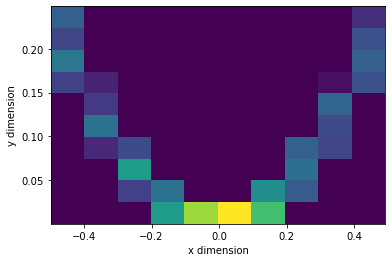

In [3]:
print(data.shape)
x = data[:, :1].reshape(500,)
y = data[:, 1:2].reshape(500,)

plt.xlabel('x dimension')
plt.ylabel('y dimension')
plt.hist2d(x, y)

In [4]:
glash = Glash(glash_discriminator(), glash_generator(act_fun_2=tf.keras.activations.tanh))
glash.compile(
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adam(),
    tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [5]:
generated_point_list = []

cbk = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: show_samples(generated_point_list, epoch, glash.generator, data))

history = glash.fit(train_data, epochs=5000, callbacks=[cbk], verbose=True)

Epoch 1/5000


2022-04-04 18:13:17.168924: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-04 18:13:17.194933: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2022-04-04 18:13:17.300942: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


8/8 [==============================] - 1s 2ms/step - d_loss: 0.7193 - g_loss: 0.6145
Epoch 2/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6959 - g_loss: 0.6684
Epoch 3/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6785 - g_loss: 0.7059
Epoch 4/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6709 - g_loss: 0.7646
Epoch 5/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6555 - g_loss: 0.7991
Epoch 6/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6465 - g_loss: 0.8356
Epoch 7/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6311 - g_loss: 0.8675
Epoch 8/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6344 - g_loss: 0.8901
Epoch 9/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6229 - g_loss: 0.8929
Epoch 10/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6199 - g_loss: 0.9066
Epoch 11/5000
8/8 [=============

Epoch 84/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6656 - g_loss: 0.7418
Epoch 85/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6752 - g_loss: 0.7257
Epoch 86/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7014 - g_loss: 0.6623
Epoch 87/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7219 - g_loss: 0.6305
Epoch 88/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7098 - g_loss: 0.6572
Epoch 89/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6857 - g_loss: 0.7233
Epoch 90/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6702 - g_loss: 0.7531
Epoch 91/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6743 - g_loss: 0.7499
Epoch 92/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6846 - g_loss: 0.7233
Epoch 93/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6986
Epoch 94/5

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.7140
Epoch 167/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6876 - g_loss: 0.7127
Epoch 168/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6880 - g_loss: 0.7056
Epoch 169/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6980
Epoch 170/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6834
Epoch 171/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6828
Epoch 172/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6869 - g_loss: 0.6977
Epoch 173/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.6773 - g_loss: 0.7174
Epoch 174/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6694 - g_loss: 0.7328
Epoch 175/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6644 - g_loss: 0.7428
Epoch 176/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7378 - g_loss: 0.6007
Epoch 249/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7471 - g_loss: 0.5898
Epoch 250/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7308 - g_loss: 0.6318
Epoch 251/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7057 - g_loss: 0.6857
Epoch 252/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.7241
Epoch 253/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6883 - g_loss: 0.7382
Epoch 254/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.7256
Epoch 255/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6899 - g_loss: 0.7253
Epoch 256/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6865 - g_loss: 0.7270
Epoch 257/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6824 - g_loss: 0.7265
Epoch 258/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7102 - g_loss: 0.6767
Epoch 330/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7116 - g_loss: 0.6673
Epoch 331/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7138 - g_loss: 0.6677
Epoch 332/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7085 - g_loss: 0.6747
Epoch 333/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6994 - g_loss: 0.6967
Epoch 334/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6874 - g_loss: 0.7230
Epoch 335/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6739 - g_loss: 0.7580
Epoch 336/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6601 - g_loss: 0.7897
Epoch 337/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6512 - g_loss: 0.8091
Epoch 338/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6435 - g_loss: 0.8208
Epoch 339/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7020 - g_loss: 0.7207
Epoch 412/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.7257
Epoch 413/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6851 - g_loss: 0.7252
Epoch 414/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6870 - g_loss: 0.7116
Epoch 415/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.6920
Epoch 416/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7057 - g_loss: 0.6708
Epoch 417/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7068 - g_loss: 0.6684
Epoch 418/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7000 - g_loss: 0.6753
Epoch 419/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6900 - g_loss: 0.6946
Epoch 420/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6783 - g_loss: 0.7217
Epoch 421/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6454
Epoch 494/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7710 - g_loss: 0.5348
Epoch 495/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8071 - g_loss: 0.4937
Epoch 496/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8152 - g_loss: 0.4928
Epoch 497/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7928 - g_loss: 0.5371
Epoch 498/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7514 - g_loss: 0.6153
Epoch 499/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7104 - g_loss: 0.7089
Epoch 500/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6799 - g_loss: 0.7886
Epoch 501/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6652 - g_loss: 0.8270
Epoch 502/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6630 - g_loss: 0.8274
Epoch 503/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6799 - g_loss: 0.7554
Epoch 576/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6765 - g_loss: 0.7518
Epoch 577/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6707 - g_loss: 0.7508
Epoch 578/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6650 - g_loss: 0.7505
Epoch 579/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6599 - g_loss: 0.7491
Epoch 580/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6562 - g_loss: 0.7469
Epoch 581/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6530 - g_loss: 0.7461
Epoch 582/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6494 - g_loss: 0.7453
Epoch 583/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6458 - g_loss: 0.7482
Epoch 584/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6419 - g_loss: 0.7514
Epoch 585/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7463 - g_loss: 0.5888
Epoch 658/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7360 - g_loss: 0.6107
Epoch 659/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7177 - g_loss: 0.6457
Epoch 660/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6950 - g_loss: 0.6914
Epoch 661/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6733 - g_loss: 0.7447
Epoch 662/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6527 - g_loss: 0.7929
Epoch 663/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6356 - g_loss: 0.8356
Epoch 664/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6258 - g_loss: 0.8559
Epoch 665/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6202 - g_loss: 0.8645
Epoch 666/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6180 - g_loss: 0.8593
Epoch 667/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6570 - g_loss: 0.7836
Epoch 740/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6541 - g_loss: 0.7809
Epoch 741/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6524 - g_loss: 0.7758
Epoch 742/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6530 - g_loss: 0.7663
Epoch 743/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6574 - g_loss: 0.7504
Epoch 744/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6657 - g_loss: 0.7283
Epoch 745/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6760 - g_loss: 0.6991
Epoch 746/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6534
Epoch 747/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7272 - g_loss: 0.6057
Epoch 748/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7457 - g_loss: 0.5683
Epoch 749/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6812 - g_loss: 0.6761
Epoch 822/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7165 - g_loss: 0.6270
Epoch 823/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7512 - g_loss: 0.5679
Epoch 824/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7786 - g_loss: 0.5447
Epoch 825/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7844 - g_loss: 0.5367
Epoch 826/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7793 - g_loss: 0.5519
Epoch 827/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7622 - g_loss: 0.5894
Epoch 828/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7410 - g_loss: 0.6401
Epoch 829/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7213 - g_loss: 0.6984
Epoch 830/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6996 - g_loss: 0.7396
Epoch 831/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6492 - g_loss: 0.7931
Epoch 903/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6445 - g_loss: 0.7903
Epoch 904/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6404 - g_loss: 0.7853
Epoch 905/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6394 - g_loss: 0.7762
Epoch 906/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6445 - g_loss: 0.7542
Epoch 907/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6653 - g_loss: 0.7352
Epoch 908/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6689 - g_loss: 0.6889
Epoch 909/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6899 - g_loss: 0.6746
Epoch 910/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7005 - g_loss: 0.6505
Epoch 911/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7357 - g_loss: 0.6216
Epoch 912/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6248 - g_loss: 0.9429
Epoch 985/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6225 - g_loss: 0.9207
Epoch 986/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6279 - g_loss: 0.8864
Epoch 987/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6331 - g_loss: 0.8554
Epoch 988/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6384 - g_loss: 0.8296
Epoch 989/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6406 - g_loss: 0.8070
Epoch 990/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6410 - g_loss: 0.7894
Epoch 991/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6395 - g_loss: 0.7753
Epoch 992/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6446 - g_loss: 0.7606
Epoch 993/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6484 - g_loss: 0.7311
Epoch 994/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.5956 - g_loss: 0.8545
Epoch 1066/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5893 - g_loss: 0.8682
Epoch 1067/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5840 - g_loss: 0.8792
Epoch 1068/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5792 - g_loss: 0.8895
Epoch 1069/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5741 - g_loss: 0.9000
Epoch 1070/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5691 - g_loss: 0.9101
Epoch 1071/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5640 - g_loss: 0.9218
Epoch 1072/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5586 - g_loss: 0.9317
Epoch 1073/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.5536 - g_loss: 0.9410
Epoch 1074/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5487 - g_loss: 0.9492
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6313 - g_loss: 0.8336
Epoch 1147/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6231 - g_loss: 0.8313
Epoch 1148/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6160 - g_loss: 0.8318
Epoch 1149/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6101 - g_loss: 0.8319
Epoch 1150/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6040 - g_loss: 0.8353
Epoch 1151/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5986 - g_loss: 0.8402
Epoch 1152/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5930 - g_loss: 0.8450
Epoch 1153/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5885 - g_loss: 0.8508
Epoch 1154/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5838 - g_loss: 0.8608
Epoch 1155/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5786 - g_loss: 0.8707
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.9092 - g_loss: 0.4049
Epoch 1228/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.9272 - g_loss: 0.4121
Epoch 1229/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.9202 - g_loss: 0.4277
Epoch 1230/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8768 - g_loss: 0.4748
Epoch 1231/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8204 - g_loss: 0.5593
Epoch 1232/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7609 - g_loss: 0.6752
Epoch 1233/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7029 - g_loss: 0.8177
Epoch 1234/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6642 - g_loss: 0.9472
Epoch 1235/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6404 - g_loss: 1.0114
Epoch 1236/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6303 - g_loss: 1.0359
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7117 - g_loss: 0.8231
Epoch 1308/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6613 - g_loss: 1.0150
Epoch 1309/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6365 - g_loss: 1.1016
Epoch 1310/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6356 - g_loss: 1.0875
Epoch 1311/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6547 - g_loss: 0.9915
Epoch 1312/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6648 - g_loss: 0.9202
Epoch 1313/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6644 - g_loss: 0.8882
Epoch 1314/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6658 - g_loss: 0.8559
Epoch 1315/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6594 - g_loss: 0.8419
Epoch 1316/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6527 - g_loss: 0.8320
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5168 - g_loss: 0.9664
Epoch 1389/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5137 - g_loss: 0.9679
Epoch 1390/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5135 - g_loss: 0.9665
Epoch 1391/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5171 - g_loss: 0.9461
Epoch 1392/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5262 - g_loss: 0.9251
Epoch 1393/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5374 - g_loss: 0.8899
Epoch 1394/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5562 - g_loss: 0.8471
Epoch 1395/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5805 - g_loss: 0.7936
Epoch 1396/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6107 - g_loss: 0.7332
Epoch 1397/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6565 - g_loss: 0.6612
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7893 - g_loss: 0.5974
Epoch 1470/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7757 - g_loss: 0.6201
Epoch 1471/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7603 - g_loss: 0.6501
Epoch 1472/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7356 - g_loss: 0.7019
Epoch 1473/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7012 - g_loss: 0.7702
Epoch 1474/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6681 - g_loss: 0.8538
Epoch 1475/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6370 - g_loss: 0.9310
Epoch 1476/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6143 - g_loss: 0.9827
Epoch 1477/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5983 - g_loss: 1.0135
Epoch 1478/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5897 - g_loss: 1.0233
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5154 - g_loss: 0.9970
Epoch 1551/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5262 - g_loss: 0.9558
Epoch 1552/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5443 - g_loss: 0.8988
Epoch 1553/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5654 - g_loss: 0.8538
Epoch 1554/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5890 - g_loss: 0.8131
Epoch 1555/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6244 - g_loss: 0.7370
Epoch 1556/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6851 - g_loss: 0.6700
Epoch 1557/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.7582 - g_loss: 0.5588
Epoch 1558/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8375 - g_loss: 0.4783
Epoch 1559/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8943 - g_loss: 0.4402
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8658 - g_loss: 0.4637
Epoch 1632/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.8743 - g_loss: 0.4656
Epoch 1633/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.8690 - g_loss: 0.4798
Epoch 1634/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.8372 - g_loss: 0.5472
Epoch 1635/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7842 - g_loss: 0.6593
Epoch 1636/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7324 - g_loss: 0.8017
Epoch 1637/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6904 - g_loss: 0.9395
Epoch 1638/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6703 - g_loss: 1.0167
Epoch 1639/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6608 - g_loss: 1.0500
Epoch 1640/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6677 - g_loss: 1.0062
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6965 - g_loss: 0.9503
Epoch 1713/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.9636
Epoch 1714/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.9350
Epoch 1715/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.9078
Epoch 1716/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.8951
Epoch 1717/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.8733
Epoch 1718/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6868 - g_loss: 0.8585
Epoch 1719/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.6816 - g_loss: 0.8514
Epoch 1720/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6764 - g_loss: 0.8430
Epoch 1721/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6699 - g_loss: 0.8371
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7035 - g_loss: 0.6491
Epoch 1794/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7127 - g_loss: 0.6112
Epoch 1795/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7422 - g_loss: 0.5698
Epoch 1796/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7645 - g_loss: 0.5436
Epoch 1797/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7815 - g_loss: 0.5282
Epoch 1798/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7843 - g_loss: 0.5375
Epoch 1799/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7885 - g_loss: 0.5363
Epoch 1800/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7834 - g_loss: 0.5565
Epoch 1801/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7694 - g_loss: 0.5810
Epoch 1802/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7467 - g_loss: 0.6335
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6588 - g_loss: 0.8595
Epoch 1875/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6575 - g_loss: 0.8410
Epoch 1876/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6569 - g_loss: 0.8231
Epoch 1877/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6551 - g_loss: 0.8114
Epoch 1878/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6521 - g_loss: 0.8014
Epoch 1879/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6475 - g_loss: 0.7914
Epoch 1880/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6420 - g_loss: 0.7893
Epoch 1881/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6382 - g_loss: 0.7840
Epoch 1882/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6332 - g_loss: 0.7782
Epoch 1883/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6292 - g_loss: 0.7743
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6638 - g_loss: 0.7080
Epoch 1956/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7214 - g_loss: 0.6532
Epoch 1957/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7534 - g_loss: 0.6034
Epoch 1958/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8065 - g_loss: 0.5566
Epoch 1959/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8193 - g_loss: 0.5251
Epoch 1960/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8479 - g_loss: 0.5023
Epoch 1961/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8332 - g_loss: 0.5254
Epoch 1962/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7967 - g_loss: 0.5225
Epoch 1963/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7754 - g_loss: 0.5640
Epoch 1964/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7454 - g_loss: 0.6302
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.4840 - g_loss: 1.0654
Epoch 2036/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.4832 - g_loss: 1.0574
Epoch 2037/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.4907 - g_loss: 1.0283
Epoch 2038/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5214 - g_loss: 0.9488
Epoch 2039/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5835 - g_loss: 0.8143
Epoch 2040/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6760 - g_loss: 0.6576
Epoch 2041/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7670 - g_loss: 0.5062
Epoch 2042/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8423 - g_loss: 0.4372
Epoch 2043/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.9141 - g_loss: 0.3971
Epoch 2044/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.9917 - g_loss: 0.3495
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6338 - g_loss: 0.8486
Epoch 2117/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6193 - g_loss: 0.8817
Epoch 2118/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6104 - g_loss: 0.8873
Epoch 2119/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6050 - g_loss: 0.8953
Epoch 2120/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6016 - g_loss: 0.8948
Epoch 2121/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5992 - g_loss: 0.8893
Epoch 2122/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5952 - g_loss: 0.8858
Epoch 2123/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5925 - g_loss: 0.8882
Epoch 2124/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5902 - g_loss: 0.8825
Epoch 2125/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5874 - g_loss: 0.8808
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6608 - g_loss: 0.8607
Epoch 2198/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6596 - g_loss: 0.8304
Epoch 2199/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6601 - g_loss: 0.8325
Epoch 2200/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6570 - g_loss: 0.8129
Epoch 2201/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6541 - g_loss: 0.8008
Epoch 2202/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6509 - g_loss: 0.7960
Epoch 2203/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6468 - g_loss: 0.7901
Epoch 2204/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6403 - g_loss: 0.7846
Epoch 2205/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6364 - g_loss: 0.7807
Epoch 2206/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6341 - g_loss: 0.7740
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.7793 - g_loss: 0.5952
Epoch 2279/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7585 - g_loss: 0.6331
Epoch 2280/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7316 - g_loss: 0.6766
Epoch 2281/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7016 - g_loss: 0.7320
Epoch 2282/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6749 - g_loss: 0.7971
Epoch 2283/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6485 - g_loss: 0.8535
Epoch 2284/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6347 - g_loss: 0.8801
Epoch 2285/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6238 - g_loss: 0.8956
Epoch 2286/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6185 - g_loss: 0.8999
Epoch 2287/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6161 - g_loss: 0.8910
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6267 - g_loss: 0.8047
Epoch 2359/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6204 - g_loss: 0.8094
Epoch 2360/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6148 - g_loss: 0.8183
Epoch 2361/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6083 - g_loss: 0.8291
Epoch 2362/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6026 - g_loss: 0.8396
Epoch 2363/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5972 - g_loss: 0.8490
Epoch 2364/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5911 - g_loss: 0.8584
Epoch 2365/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5848 - g_loss: 0.8710
Epoch 2366/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5786 - g_loss: 0.8809
Epoch 2367/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5730 - g_loss: 0.8934
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7224 - g_loss: 0.6366
Epoch 2440/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7512 - g_loss: 0.6188
Epoch 2441/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7467 - g_loss: 0.6391
Epoch 2442/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7626 - g_loss: 0.6212
Epoch 2443/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7641 - g_loss: 0.6287
Epoch 2444/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7455 - g_loss: 0.6338
Epoch 2445/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7409 - g_loss: 0.6498
Epoch 2446/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7354 - g_loss: 0.6685
Epoch 2447/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7199 - g_loss: 0.6898
Epoch 2448/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7094 - g_loss: 0.7084
Epoch 

8/8 [==============================] - 0s 4ms/step - d_loss: 1.2333 - g_loss: 0.2006
Epoch 2521/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.2493 - g_loss: 0.2193
Epoch 2522/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.1848 - g_loss: 0.2761
Epoch 2523/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.0550 - g_loss: 0.3954
Epoch 2524/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.9256 - g_loss: 0.5804
Epoch 2525/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.8314 - g_loss: 0.7882
Epoch 2526/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7898 - g_loss: 0.8628
Epoch 2527/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7811 - g_loss: 0.8395
Epoch 2528/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7707 - g_loss: 0.8170
Epoch 2529/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7663 - g_loss: 0.7879
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6313 - g_loss: 0.8060
Epoch 2602/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6254 - g_loss: 0.8091
Epoch 2603/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6197 - g_loss: 0.8124
Epoch 2604/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6145 - g_loss: 0.8158
Epoch 2605/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6097 - g_loss: 0.8186
Epoch 2606/5000
8/8 [==============================] - ETA: 0s - d_loss: 0.6152 - g_loss: 0.82 - 0s 2ms/step - d_loss: 0.6065 - g_loss: 0.8191
Epoch 2607/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6062 - g_loss: 0.8110
Epoch 2608/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6145 - g_loss: 0.7917
Epoch 2609/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6319 - g_loss: 0.7515
Epoch 2610/5000
8/8 [==============================] - 0s 2ms/ste

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6364 - g_loss: 0.7559
Epoch 2682/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6343 - g_loss: 0.7491
Epoch 2683/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6384 - g_loss: 0.7357
Epoch 2684/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6518 - g_loss: 0.7056
Epoch 2685/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6750 - g_loss: 0.6648
Epoch 2686/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6975 - g_loss: 0.6221
Epoch 2687/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7189 - g_loss: 0.5990
Epoch 2688/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7348 - g_loss: 0.5888
Epoch 2689/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7465 - g_loss: 0.5821
Epoch 2690/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7534 - g_loss: 0.5843
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8060 - g_loss: 0.5715
Epoch 2763/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8298 - g_loss: 0.5757
Epoch 2764/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8185 - g_loss: 0.5723
Epoch 2765/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8079 - g_loss: 0.6022
Epoch 2766/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7904 - g_loss: 0.6461
Epoch 2767/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7587 - g_loss: 0.7052
Epoch 2768/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7249 - g_loss: 0.7754
Epoch 2769/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6994 - g_loss: 0.8398
Epoch 2770/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6781 - g_loss: 0.8887
Epoch 2771/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6620 - g_loss: 0.9087
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8002 - g_loss: 0.8145
Epoch 2844/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7505 - g_loss: 0.9437
Epoch 2845/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7321 - g_loss: 0.9413
Epoch 2846/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7283 - g_loss: 0.9115
Epoch 2847/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7200 - g_loss: 0.8699
Epoch 2848/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7161 - g_loss: 0.8409
Epoch 2849/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7104 - g_loss: 0.8186
Epoch 2850/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7068 - g_loss: 0.8015
Epoch 2851/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7016 - g_loss: 0.7922
Epoch 2852/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.7896
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6298 - g_loss: 0.9063
Epoch 2924/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6274 - g_loss: 0.8953
Epoch 2925/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6238 - g_loss: 0.8884
Epoch 2926/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6177 - g_loss: 0.8913
Epoch 2927/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6118 - g_loss: 0.8935
Epoch 2928/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6073 - g_loss: 0.8950
Epoch 2929/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6025 - g_loss: 0.8956
Epoch 2930/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.5992 - g_loss: 0.8943
Epoch 2931/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5962 - g_loss: 0.8925
Epoch 2932/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5946 - g_loss: 0.8887
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5846 - g_loss: 0.8978
Epoch 3005/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5817 - g_loss: 0.8987
Epoch 3006/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5784 - g_loss: 0.8997
Epoch 3007/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5755 - g_loss: 0.9000
Epoch 3008/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.5729 - g_loss: 0.8993
Epoch 3009/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.5708 - g_loss: 0.8967
Epoch 3010/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5698 - g_loss: 0.8909
Epoch 3011/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.5706 - g_loss: 0.8781
Epoch 3012/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5775 - g_loss: 0.8533
Epoch 3013/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5911 - g_loss: 0.8137
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5504 - g_loss: 0.9724
Epoch 3086/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5463 - g_loss: 0.9776
Epoch 3087/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5426 - g_loss: 0.9813
Epoch 3088/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5394 - g_loss: 0.9834
Epoch 3089/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5364 - g_loss: 0.9850
Epoch 3090/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5342 - g_loss: 0.9837
Epoch 3091/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5327 - g_loss: 0.9792
Epoch 3092/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5326 - g_loss: 0.9735
Epoch 3093/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5323 - g_loss: 0.9664
Epoch 3094/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5329 - g_loss: 0.9554
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5575 - g_loss: 0.8045
Epoch 3167/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6789 - g_loss: 0.6742
Epoch 3168/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8166 - g_loss: 0.5618
Epoch 3169/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8913 - g_loss: 0.5104
Epoch 3170/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.0374 - g_loss: 0.4059
Epoch 3171/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.1028 - g_loss: 0.4020
Epoch 3172/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 1.1457 - g_loss: 0.3397
Epoch 3173/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.1501 - g_loss: 0.3410
Epoch 3174/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.1187 - g_loss: 0.3695
Epoch 3175/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 1.0602 - g_loss: 0.4362
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6704 - g_loss: 0.6687
Epoch 3248/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.6930 - g_loss: 0.6433
Epoch 3249/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7101 - g_loss: 0.6109
Epoch 3250/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7327 - g_loss: 0.5903
Epoch 3251/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7685 - g_loss: 0.5620
Epoch 3252/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7754 - g_loss: 0.5429
Epoch 3253/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8005 - g_loss: 0.5428
Epoch 3254/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8043 - g_loss: 0.5574
Epoch 3255/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8185 - g_loss: 0.5693
Epoch 3256/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8060 - g_loss: 0.5891
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6562 - g_loss: 0.6882
Epoch 3329/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6752 - g_loss: 0.6580
Epoch 3330/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7074 - g_loss: 0.6172
Epoch 3331/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7325 - g_loss: 0.6017
Epoch 3332/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7454 - g_loss: 0.5911
Epoch 3333/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7721 - g_loss: 0.5719
Epoch 3334/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7903 - g_loss: 0.5654
Epoch 3335/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7976 - g_loss: 0.5694
Epoch 3336/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8055 - g_loss: 0.5745
Epoch 3337/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8043 - g_loss: 0.6021
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6076 - g_loss: 0.7716
Epoch 3410/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6151 - g_loss: 0.7608
Epoch 3411/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6192 - g_loss: 0.7486
Epoch 3412/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6259 - g_loss: 0.7398
Epoch 3413/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6333 - g_loss: 0.7300
Epoch 3414/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6461 - g_loss: 0.7086
Epoch 3415/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6657 - g_loss: 0.6712
Epoch 3416/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6975 - g_loss: 0.6343
Epoch 3417/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7346 - g_loss: 0.6064
Epoch 3418/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7803 - g_loss: 0.5531
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7095 - g_loss: 0.6318
Epoch 3491/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7254 - g_loss: 0.6159
Epoch 3492/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7372 - g_loss: 0.6181
Epoch 3493/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7596 - g_loss: 0.6157
Epoch 3494/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7685 - g_loss: 0.6260
Epoch 3495/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7685 - g_loss: 0.6295
Epoch 3496/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7722 - g_loss: 0.6570
Epoch 3497/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7594 - g_loss: 0.6773
Epoch 3498/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7451 - g_loss: 0.7164
Epoch 3499/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7225 - g_loss: 0.7719
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8662 - g_loss: 0.5600
Epoch 3572/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8281 - g_loss: 0.6470
Epoch 3573/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7785 - g_loss: 0.7858
Epoch 3574/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7283 - g_loss: 0.9336
Epoch 3575/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 1.0471
Epoch 3576/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6744 - g_loss: 1.0729
Epoch 3577/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6669 - g_loss: 1.0524
Epoch 3578/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6636 - g_loss: 1.0203
Epoch 3579/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6556 - g_loss: 0.9976
Epoch 3580/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6475 - g_loss: 0.9781
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6948 - g_loss: 0.8087
Epoch 3652/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7000 - g_loss: 0.7848
Epoch 3653/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7020 - g_loss: 0.7695
Epoch 3654/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6982 - g_loss: 0.7667
Epoch 3655/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.7631
Epoch 3656/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.7658
Epoch 3657/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6854 - g_loss: 0.7694
Epoch 3658/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6801 - g_loss: 0.7698
Epoch 3659/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6764 - g_loss: 0.7743
Epoch 3660/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6730 - g_loss: 0.7775
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6881
Epoch 3733/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6881
Epoch 3734/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6900 - g_loss: 0.6928
Epoch 3735/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6945
Epoch 3736/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.6960
Epoch 3737/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6948
Epoch 3738/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6981
Epoch 3739/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6891 - g_loss: 0.6972
Epoch 3740/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6930
Epoch 3741/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.7001
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6974
Epoch 3814/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6932
Epoch 3815/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6958
Epoch 3816/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6954
Epoch 3817/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.7004
Epoch 3818/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.7005
Epoch 3819/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.7044
Epoch 3820/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.7054
Epoch 3821/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.7003
Epoch 3822/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.7048
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6911 - g_loss: 0.7020
Epoch 3895/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6922 - g_loss: 0.7053
Epoch 3896/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6891 - g_loss: 0.7059
Epoch 3897/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6913 - g_loss: 0.6992
Epoch 3898/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6918 - g_loss: 0.7009
Epoch 3899/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.6991
Epoch 3900/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6990
Epoch 3901/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6903 - g_loss: 0.7008
Epoch 3902/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.7013
Epoch 3903/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.7023
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6948 - g_loss: 0.7030
Epoch 3976/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6939 - g_loss: 0.7047
Epoch 3977/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6929 - g_loss: 0.7110
Epoch 3978/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6893 - g_loss: 0.7161
Epoch 3979/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6838 - g_loss: 0.7222
Epoch 3980/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6808 - g_loss: 0.7243
Epoch 3981/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6811 - g_loss: 0.7246
Epoch 3982/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6834 - g_loss: 0.7038
Epoch 3983/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6978 - g_loss: 0.6732
Epoch 3984/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7073 - g_loss: 0.6492
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6955 - g_loss: 0.6823
Epoch 4057/5000
8/8 [==============================] - ETA: 0s - d_loss: 0.6906 - g_loss: 0.68 - 0s 3ms/step - d_loss: 0.6954 - g_loss: 0.6909
Epoch 4058/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6897
Epoch 4059/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6889
Epoch 4060/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6957 - g_loss: 0.6865
Epoch 4061/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6961 - g_loss: 0.6927
Epoch 4062/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.6955
Epoch 4063/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6958 - g_loss: 0.6978
Epoch 4064/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6964 - g_loss: 0.6985
Epoch 4065/5000
8/8 [==============================] - 0s 2ms/ste

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6970 - g_loss: 0.6948
Epoch 4137/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6948 - g_loss: 0.6973
Epoch 4138/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.7044
Epoch 4139/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.7031
Epoch 4140/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6984
Epoch 4141/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6983
Epoch 4142/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6907
Epoch 4143/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6841
Epoch 4144/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6956 - g_loss: 0.6862
Epoch 4145/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.6883
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6923
Epoch 4218/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6926
Epoch 4219/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6914
Epoch 4220/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.6909
Epoch 4221/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6888
Epoch 4222/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6871
Epoch 4223/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6921
Epoch 4224/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6901
Epoch 4225/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6926
Epoch 4226/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6914
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6936
Epoch 4299/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6954
Epoch 4300/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.7003
Epoch 4301/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.7004
Epoch 4302/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6965
Epoch 4303/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6970
Epoch 4304/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6942
Epoch 4305/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.6913
Epoch 4306/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6896
Epoch 4307/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6945
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.6905
Epoch 4380/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6922
Epoch 4381/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6901
Epoch 4382/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6956 - g_loss: 0.6827
Epoch 4383/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.6893
Epoch 4384/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6934
Epoch 4385/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6940 - g_loss: 0.6944
Epoch 4386/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6936
Epoch 4387/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6909
Epoch 4388/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6893
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6974
Epoch 4460/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6997
Epoch 4461/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6960 - g_loss: 0.7008
Epoch 4462/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6961 - g_loss: 0.7016
Epoch 4463/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.7044
Epoch 4464/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6927 - g_loss: 0.7035
Epoch 4465/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.7035
Epoch 4466/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.7038
Epoch 4467/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.7053
Epoch 4468/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.7035
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6940 - g_loss: 0.6950
Epoch 4541/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6932 - g_loss: 0.6946
Epoch 4542/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6937 - g_loss: 0.6949
Epoch 4543/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6937 - g_loss: 0.6926
Epoch 4544/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6940 - g_loss: 0.6932
Epoch 4545/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6931 - g_loss: 0.6928
Epoch 4546/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6935 - g_loss: 0.6955
Epoch 4547/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6932 - g_loss: 0.6941
Epoch 4548/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6929 - g_loss: 0.6953
Epoch 4549/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6939 - g_loss: 0.6939
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6916
Epoch 4622/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6929 - g_loss: 0.6923
Epoch 4623/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6927 - g_loss: 0.6940
Epoch 4624/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6922
Epoch 4625/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6921 - g_loss: 0.6933
Epoch 4626/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6922 - g_loss: 0.6943
Epoch 4627/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6923 - g_loss: 0.6955
Epoch 4628/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6932 - g_loss: 0.6948
Epoch 4629/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6940 - g_loss: 0.6908
Epoch 4630/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6916
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6929 - g_loss: 0.6995
Epoch 4703/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6983
Epoch 4704/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6945
Epoch 4705/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6904
Epoch 4706/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6926
Epoch 4707/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6932
Epoch 4708/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6921
Epoch 4709/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6915
Epoch 4710/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6947
Epoch 4711/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6983
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6912
Epoch 4784/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6897
Epoch 4785/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6958
Epoch 4786/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6899 - g_loss: 0.6995
Epoch 4787/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6875 - g_loss: 0.7063
Epoch 4788/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6855 - g_loss: 0.7067
Epoch 4789/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6830 - g_loss: 0.7059
Epoch 4790/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6834 - g_loss: 0.6978
Epoch 4791/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6768
Epoch 4792/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7093 - g_loss: 0.6686
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6867
Epoch 4865/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6886
Epoch 4866/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6909
Epoch 4867/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6920
Epoch 4868/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6969
Epoch 4869/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.7000
Epoch 4870/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.7011
Epoch 4871/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.7021
Epoch 4872/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6961
Epoch 4873/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6894
Epoch 

8/8 [==============================] - 0s 4ms/step - d_loss: 0.6932 - g_loss: 0.6986
Epoch 4946/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6921 - g_loss: 0.6973
Epoch 4947/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6928 - g_loss: 0.6959
Epoch 4948/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6925 - g_loss: 0.6952
Epoch 4949/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6928 - g_loss: 0.6935
Epoch 4950/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6923 - g_loss: 0.6912
Epoch 4951/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6936 - g_loss: 0.6927
Epoch 4952/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6925 - g_loss: 0.6918
Epoch 4953/5000
8/8 [==============================] - 0s 4ms/step - d_loss: 0.6933 - g_loss: 0.6930
Epoch 4954/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6932 - g_loss: 0.6914
Epoch 

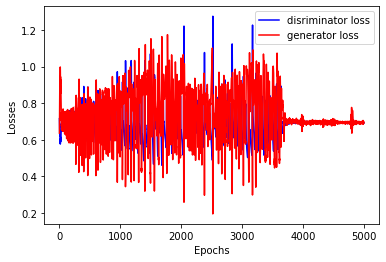

In [6]:
plt.plot(history.history['d_loss'], color='blue', label='disriminator loss')
plt.plot(history.history['g_loss'], color='red', label='generator loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [7]:
make_animation((data[:, 0], data[:, 1]), generated_point_list)

MovieWriter ffmpeg unavailable; using Pillow instead.


In [12]:
glash.generator.save("U_glash.h5")

In [14]:
from tensorflow.keras.models import load_model

generator = load_model('U_glash.h5')